## Research Papers:

   Multi-digit Number Recognition from Street View Imagery using Deep Convolutional Neural Networks (https://static.googleusercontent.com/media/research.google.com/en//pubs/archive/42241.pdf)
   Reading Digits in Natural Images with Unsupervised Feature Learning (http://ufldl.stanford.edu/housenumbers/nips2011_housenumbers.pdf)

In [4]:
import h5py
import os
import time
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.patches as patches
from matplotlib.patches import Rectangle

In [5]:
png_directory = 'data'
mat_directory = 'mats'

def display_files(png_directory):

    for dirname in os.listdir(png_directory):
        path        = os.path.join(png_directory, dirname)
        print("{}:\t{} files".format(dirname, len(os.listdir(path))))
        
display_files(png_directory)

extra:	202355 files
train:	33404 files
test:	13071 files


HEIGHT 223.0 WIDTH 173.0
FILE:1.png, DIGITS:[ 1.  9.]
FILE:1.png, DIGIT:1
FILE:9.png, DIGITS:[ 1.  2.  8.]


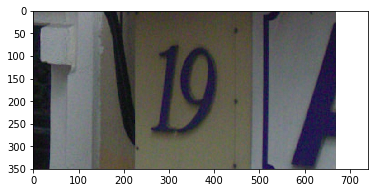

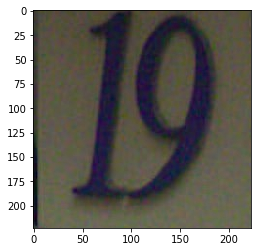

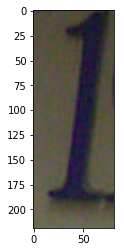

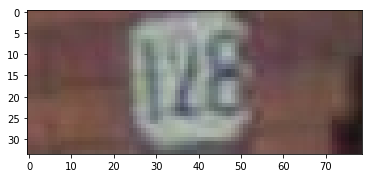

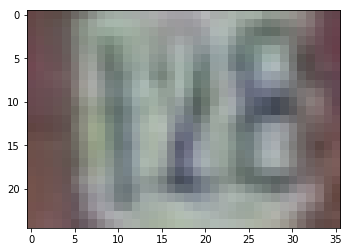

In [75]:
%matplotlib inline

class Picture(object):
    
    def __init__(self, name, path, digits, all_heights, all_widths, all_tops, all_lefts):
        self.name        = name
        self.path        = path
        self.digits      = digits
        self.img_array   = mpimg.imread(self.path)
        self.crop_array  = None
        self.all_heights = all_heights
        self.all_widths  = all_widths
        self.all_tops    = all_tops
        self.all_lefts   = all_lefts
        
    def crop(self):
        top    = min(self.all_tops)
        left   = min(self.all_lefts)
        bottom = max([height+top for height, top in zip(self.all_heights, self.all_tops)])
        right  = max([width+left for width, left in zip(self.all_widths, self.all_lefts)])
        self.img_array = self.img_array[int(top):int(bottom), int(left):int(right)]
        
    def crop_even_sides(self):
        top    = min(self.all_tops)
        left   = min(self.all_lefts)
        bottom = max([height+top for height, top in zip(self.all_heights, self.all_tops)])
        right  = max([width+left for width, left in zip(self.all_widths, self.all_lefts)])
        height = bottom - top
        width  = right - left
        print("HEIGHT", height, "WIDTH", width)

        if height > width:
            width_center = ((right - left) / 2) + left
            start        = width_center - (height / 2)
            end          = start + height
            self.img_array = self.img_array[int(top):int(bottom), int(start):int(end)]
            
        else:
            print("TOP", top, "BOTTOM", bottom, "LEFT", left, "RIGHT", right)
            height_center = ((bottom - top) / 2) + top
            start         = height_center - (width / 2)
            end           = start + width
            print("START", start, "END", end)
            self.img_array = self.img_array[int(start):int(end), int(left):int(right)]

        
        
    def display(self):
        fig,ax  = plt.subplots(1)
        ax.imshow(self.img_array)
        
    def __repr__(self):
        return "FILE:{}, DIGITS:{}".format(self.name, self.digits)

class Digit(object):
    
    def __init__(self, img_file, img_path, label, height, width, top, left):
        self.image_file = img_file
        self.image_path = img_path
        self.label      = label
        self.height     = height
        self.width      = width
        self.top        = top
        self.left       = left
        self.img_array  = None

    def crop(self):
        img            = mpimg.imread(self.image_path)
        self.img_array = img[int(self.top): int(self.top + self.height), int(self.left): int(self.left + self.width)]

    def crop_even_sides(self):
        img = mpimg.imread(self.image_path)
        if self.height > self.width:
            center         = self.left + (self.width / 2)
            width_start    = center - (self.height / 2)
            width_end      = width_start + self.height
            self.img_array = img[int(self.top): int(self.top + self.height), int(width_start): int(width_end)]

    def display(self):
        fig,ax  = plt.subplots(1)
        ax.imshow(self.img_array)
        
    def __repr__(self):
        return "FILE:{}, DIGIT:{}".format(self.image_file, self.label)

pic = Picture('1.png', 'data/train/1.png', np.array([1.0, 9.0]), [219.0, 219.0], [81.0, 96.0], [77.0, 81.0], [246.0, 323.0])
pic.display()
pic.crop_even_sides()
pic.display()
print(pic)

digit = Digit('1.png', 'data/train/1.png', 1, 219, 81, 77, 246)
digit.crop()
digit.display()
print(digit)

pic = Picture('9.png', 'data/train/9.png', np.array([1.0, 2.0, 8.0]), [24.0, 24.0, 24.0], [14.0, 13.0, 17.0], [4.0, 4.0, 5.0], [19.0, 29.0, 38.0])
pic.display()
pic.crop()
pic.display()
print(pic)

In [77]:
def get_val_helper(data_file, val):
    if len(val) > 1:
        return [ data_file[val[a].item()].value[0][0] for a in range(len(val))]
    else:
        return [val.value[0][0]]

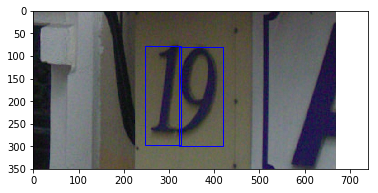


        FILENAME: 1.png, DIGITS: [1.0, 9.0], PATH: data/train/1.png,
        IMG_HEIGHT: 350, IMG_WIDTH: 741,
        HEIGHTS: [219.0, 219.0],
        WIDTHS: [81.0, 96.0],
        TOP: [77.0, 81.0],
        LEFT: [246.0, 323.0]
        ################################################################################
        


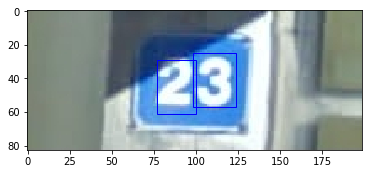


        FILENAME: 2.png, DIGITS: [2.0, 3.0], PATH: data/train/2.png,
        IMG_HEIGHT: 83, IMG_WIDTH: 199,
        HEIGHTS: [32.0, 32.0],
        WIDTHS: [23.0, 26.0],
        TOP: [29.0, 25.0],
        LEFT: [77.0, 98.0]
        ################################################################################
        


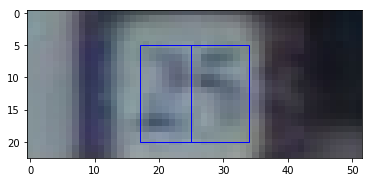


        FILENAME: 3.png, DIGITS: [2.0, 5.0], PATH: data/train/3.png,
        IMG_HEIGHT: 23, IMG_WIDTH: 52,
        HEIGHTS: [15.0, 15.0],
        WIDTHS: [8.0, 9.0],
        TOP: [5.0, 5.0],
        LEFT: [17.0, 25.0]
        ################################################################################
        


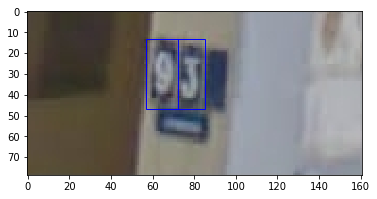


        FILENAME: 4.png, DIGITS: [9.0, 3.0], PATH: data/train/4.png,
        IMG_HEIGHT: 79, IMG_WIDTH: 161,
        HEIGHTS: [34.0, 34.0],
        WIDTHS: [15.0, 13.0],
        TOP: [13.0, 13.0],
        LEFT: [57.0, 72.0]
        ################################################################################
        


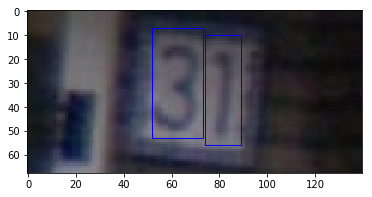


        FILENAME: 5.png, DIGITS: [3.0, 1.0], PATH: data/train/5.png,
        IMG_HEIGHT: 68, IMG_WIDTH: 140,
        HEIGHTS: [46.0, 46.0],
        WIDTHS: [21.0, 15.0],
        TOP: [7.0, 10.0],
        LEFT: [52.0, 74.0]
        ################################################################################
        


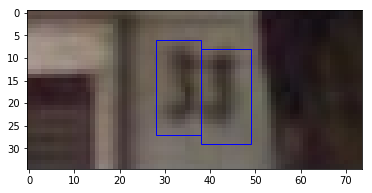


        FILENAME: 6.png, DIGITS: [3.0, 3.0], PATH: data/train/6.png,
        IMG_HEIGHT: 35, IMG_WIDTH: 74,
        HEIGHTS: [21.0, 21.0],
        WIDTHS: [10.0, 11.0],
        TOP: [6.0, 8.0],
        LEFT: [28.0, 38.0]
        ################################################################################
        


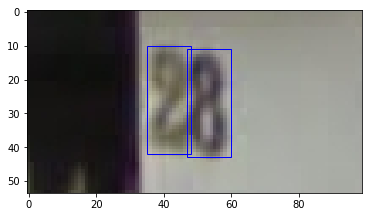


        FILENAME: 7.png, DIGITS: [2.0, 8.0], PATH: data/train/7.png,
        IMG_HEIGHT: 54, IMG_WIDTH: 99,
        HEIGHTS: [32.0, 32.0],
        WIDTHS: [13.0, 13.0],
        TOP: [10.0, 11.0],
        LEFT: [35.0, 47.0]
        ################################################################################
        


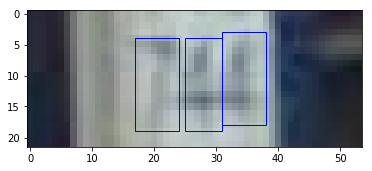


        FILENAME: 8.png, DIGITS: [7.0, 4.0, 4.0], PATH: data/train/8.png,
        IMG_HEIGHT: 22, IMG_WIDTH: 54,
        HEIGHTS: [15.0, 15.0, 15.0],
        WIDTHS: [7.0, 6.0, 7.0],
        TOP: [4.0, 4.0, 3.0],
        LEFT: [17.0, 25.0, 31.0]
        ################################################################################
        


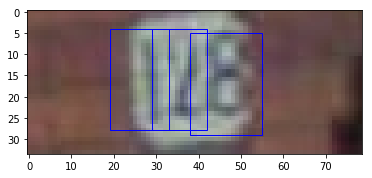


        FILENAME: 9.png, DIGITS: [1.0, 2.0, 8.0], PATH: data/train/9.png,
        IMG_HEIGHT: 34, IMG_WIDTH: 79,
        HEIGHTS: [24.0, 24.0, 24.0],
        WIDTHS: [14.0, 13.0, 17.0],
        TOP: [4.0, 4.0, 5.0],
        LEFT: [19.0, 29.0, 38.0]
        ################################################################################
        


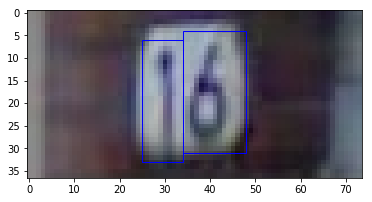


        FILENAME: 10.png, DIGITS: [1.0, 6.0], PATH: data/train/10.png,
        IMG_HEIGHT: 37, IMG_WIDTH: 74,
        HEIGHTS: [27.0, 27.0],
        WIDTHS: [9.0, 14.0],
        TOP: [6.0, 4.0],
        LEFT: [25.0, 34.0]
        ################################################################################
        
TIME: 1.8425264358520508


In [78]:
%matplotlib inline

def display_sample(dataset, png_directory, mat_directory, sample_count, random=False):
    # DATASETS: train, test, extra
    mat_file    = os.path.abspath(os.path.join(mat_directory, dataset + '_digitStruct.mat'))
    data        = h5py.File(mat_file)
    digitStruct = data['digitStruct']

    name = digitStruct['name']
    bbox = digitStruct['bbox']

    start      = time.time()

    img_count = name.shape[0]
    
    if random:
        images = np.random.choice(img_count, sample_count)
    else:
        images = range(img_count)[:sample_count]
    
    for i in images:
        name_arr = data[name[i][0]].value
        name_str = "".join([chr(c[0]) for c in name_arr])

        bbox_item = bbox[i].item()

        digits  = get_val_helper(data, data[bbox_item]['label'])
        height  = get_val_helper(data, data[bbox_item]['height'])
        width   = get_val_helper(data, data[bbox_item]['width'])
        top     = get_val_helper(data, data[bbox_item]['top'])
        left    = get_val_helper(data, data[bbox_item]['left'])

        dig_str = "".join([str(int(d)) for d in digits])
        path    = os.path.join(png_directory, dataset, name_str)

        img     = mpimg.imread(path)
        img_height  = img.shape[0]
        img_width   = img.shape[1]

        fig,ax  = plt.subplots(1)
        ax.imshow(img)

        for i, digit in enumerate(digits):
            rect = patches.Rectangle((left[i],top[i] + height[i]),width[i],-height[i],linewidth=1,edgecolor='blue',facecolor='none')
            ax.add_patch(rect)

        plt.show()

        print("""
        FILENAME: {}, DIGITS: {}, PATH: {},
        IMG_HEIGHT: {}, IMG_WIDTH: {},
        HEIGHTS: {},
        WIDTHS: {},
        TOP: {},
        LEFT: {}
        {}
        """.format(name_str, digits, path, img_height, img_width, height, width, top, left, "#"*80))

    end = time.time()
    print("TIME:", end - start)
    
display_sample('train', png_directory, mat_directory, 10, False)

In [ ]:
%matplotlib inline

import time
import cv2
import sys

def get_arrays(dataset):
    # DATASETS: train, test, extra
    arr_dir     = 'numpy_arrays'
    mat_file    = os.path.abspath(os.path.join(mat_directory, dataset + '_digitStruct.mat'))
    data        = h5py.File(mat_file)
    digitStruct = data['digitStruct']

    name = digitStruct['name']
    bbox = digitStruct['bbox']

    start     = time.time()
    img_count = name.shape[0]
    images    = range(img_count)
    
    picture_features_arrays = []
    picture_labels_arrays   = []
    digit_features_arrays   = []
    digit_labels_arrays     = []
    
    for num, i in enumerate(images):
        name_arr = data[name[i][0]].value
        name_str = "".join([chr(c[0]) for c in name_arr])

        bbox_item = bbox[i].item()
        digits  = get_val_helper(data, data[bbox_item]['label'])
        height  = get_val_helper(data, data[bbox_item]['height'])
        width   = get_val_helper(data, data[bbox_item]['width'])
        top     = get_val_helper(data, data[bbox_item]['top'])
        left    = get_val_helper(data, data[bbox_item]['left'])

        dig_str = "".join([str(int(d)) for d in digits])
        path    = os.path.join(png_directory, dataset, name_str)

        #pic = Picture(name_str, path, digits)
        pic = Picture(name_str, path, digits, height, width, top, left)
        pic.crop()
        picture_features_arrays.append(pic.img_array)
        picture_labels_arrays.append(digits)

        for i, label in enumerate(digits):
            #print(label, type(label))
            digit = Digit(name_str, path, label, height[i], width[i], top[i], left[i])
            digit.crop()
            digit_features_arrays.append(digit.img_array)
            digit_labels_arrays.append(label)
            
        if num % 100 == 0:
            print("\r{0:.2f}% Complete reading data...".format(100*(num / len(images))), end='')
            sys.stdout.flush()
            
            
    print("\nPushing data to arrays...")
    picture_features = np.array(picture_features_arrays)
    picture_labels   = np.array(picture_labels_arrays)
    digit_features   = np.array(digit_features_arrays)
    digit_labels     = np.array(digit_labels_arrays)
    
    print("Saving...")
    np.save("{}/{}_picture_features_cropped.npy".format(arr_dir, dataset), picture_features)
    print("{} picture features complete".format(dataset))
    np.save("{}/{}_picture_labels.npy".format(arr_dir, dataset), picture_labels)
    print("{} picture labels complete".format(dataset))
    np.save("{}/{}_digit_features.npy".format(arr_dir, dataset), digit_features)
    print("{} digit features complete".format(dataset))
    np.save("{}/{}_digit_labels.npy".format(arr_dir, dataset), digit_labels)
    print("{} digit labels complete".format(dataset))

            
#['train','test','extra']:
#'extra' will fail.
dataset = 'extra'
print("DATASET: {}".format(dataset))

start = time.time()
get_arrays(dataset)
print("TIME:{}".format(time.time() - start))

DATASET: extra
82.58% Complete reading data...

2.0
[2.0, 9.0]


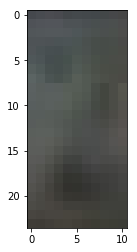

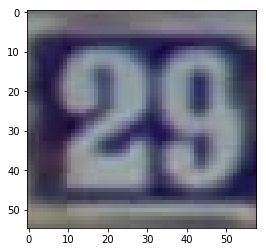

In [80]:
# TESTING
%matplotlib inline

picture_features = np.load('numpy_arrays/train_picture_features_cropped.npy')
#picture_features = np.load('numpy_arrays/train_picture_features.npy')
picture_labels   = np.load('numpy_arrays/train_picture_labels.npy')
digit_features   = np.load('numpy_arrays/train_digit_features.npy')
digit_labels     = np.load('numpy_arrays/train_digit_labels.npy')

num = np.random.choice(50)
print(digit_labels[num])
fig,ax  = plt.subplots(1)
ax.imshow(digit_features[num])

print(picture_labels[num])
fig2,ax2  = plt.subplots(1)
ax2.imshow(picture_features[num])

In [9]:
import time
import glob
import cv2

def dataset_images_to_array(png_directory, dataset):
    path  = os.path.abspath(os.path.join(png_directory, dataset))
    files = glob.glob(path + '/*.png')
    print("Files in {} dataset: {}".format(dataset, len(files)))
    
    start      = time.time()
    all_images = []
    for img_file in files:
        img_path = os.path.join(path, img_file)
        image    = cv2.imread(img_path)
        all_images.append(image)

    images_array  = np.array(all_images)
    np_array_path = 'numpy_arrays/images_{}.npy'.format(dataset)
    np.save(np_array_path, images_array)
    #np.savez_compressed('numpy_arrays/images_{}.npz'.format(dataset), images_array)
    
    print("NUMPY FILE: {}".format(np_array_path))
    print("NUMPY SHAPE: {}".format(images_array.shape))
    print("PROCESS TIME: {}".format(time.time() - start))



dataset = 'test'
#dataset_images_to_array(png_directory, dataset)

(13068,)


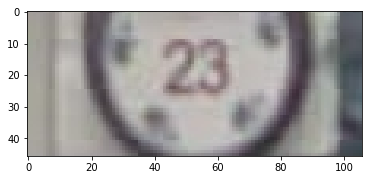

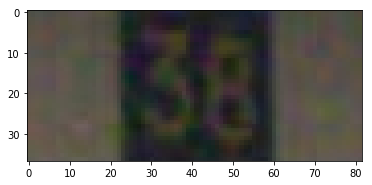

In [8]:
test = np.load('numpy_arrays/images_test.npy')
print(test.shape)

sample  = test[0]
fig,ax  = plt.subplots(1)
ax.imshow(sample)

pic = Picture('2235.png', 'data/train/2235.png', None)
pic.display()